In [1]:
from multitaper import mtspec
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,fftshift
import seaborn as sns
%matplotlib notebook
sns.set_style('darkgrid')

In [2]:
katnp = np.genfromtxt('/Users/dmelgarm/Classes/Signal_Processing/Winter2021/Data/KATNP.accel.e.txt')
time = katnp[:,0]
accel = katnp[:,1]
dt = time[1] - time[0]

In [3]:
#Let's get the MT PSD
TW = 4
ntapers = 9
mt = mtspec.MTSpec(accel,nw=TW,kspec=ntapers,dt=dt)

In [4]:
#we need the frequencies vector and the PSD vector
freq_mt = mt.freq
mt_psd = mt.spec

<IPython.core.display.Javascript object>


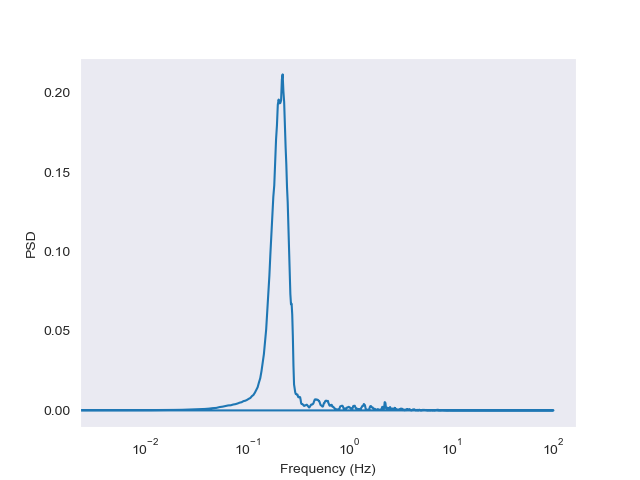

Text(0, 0.5, 'PSD')

In [5]:
plt.figure()
plt.semilogx(freq_mt,mt_psd)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

<IPython.core.display.Javascript object>


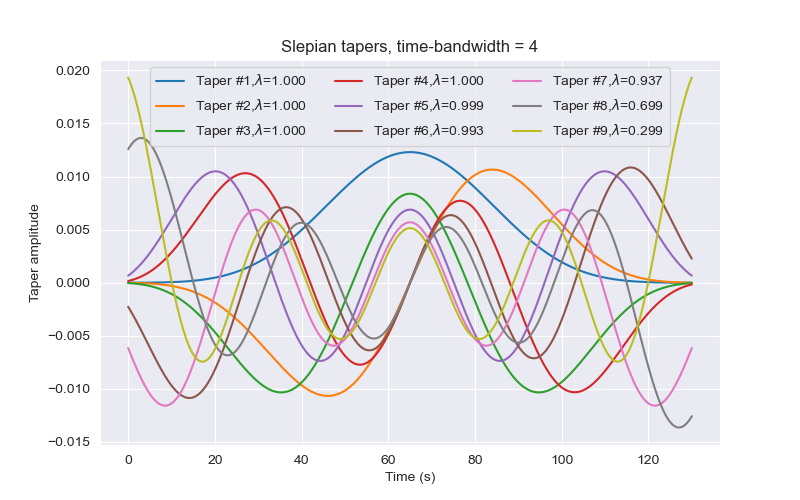

Text(0.5, 1.0, 'Slepian tapers, time-bandwidth = 4')

In [6]:
plt.figure(figsize=(8,5))
for k in range(ntapers):
    plt.plot(time,mt.vn[:,k],label = r'Taper #%d,$\lambda$=%0.3f' % (k+1,mt.lamb[k]))
    plt.xlabel('Time (s)')
    plt.ylabel('Taper amplitude')
plt.legend(ncol=3)
plt.title('Slepian tapers, time-bandwidth = 4')

In [7]:
#Jackknife the confidence intervals
# J = mt.jackspec()

KeyboardInterrupt: 

In [ ]:
# ci_low = J[:,0]
# ci_high = J[:,1]
# plt.figure()
# plt.loglog(freq_mt,mt_psd,c='k',lw=3)
# plt.loglog(freq_mt,ci_low,'--r')
# plt.loglog(freq_mt,ci_high,'--b')
# plt.grid()
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('PSD')